In [1]:
import keras
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the models from keras applications folder

In [2]:
from keras.applications import inception_v3 #,mobilenet
inception_model = inception_v3.InceptionV3(weights='imagenet')

## Import the required image preprocessing functions

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
filename = 'images/mehnat.jpg'

## Perform Pre-processing before feeding the image to the network

#### We perform the following pre-processing to the image

1. Keras loads the image using PIL library. This is done using the **load_img** function. The image is in width x height x channels format.
2. Convert the image from PIL format to Numpy format ( height x width x channels ) using **image_to_array** function.
3. Form a batch of image( s ) to feed the network. This is done using the **expand_dims** function in Numpy

In [5]:
pwd

'/Users/mac/FINAL_SUBMISSION_1_FILES'

PIL image size (299, 299)


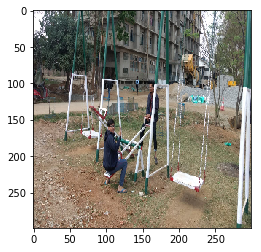

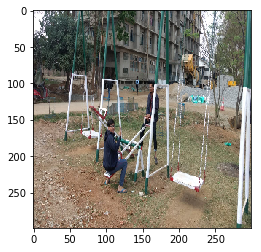

numpy array size (299, 299, 3)
image batch size (1, 299, 299, 3)


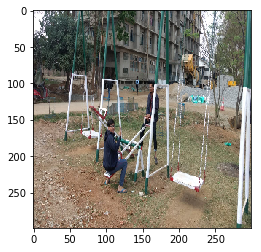

In [6]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Predictions using the various Network

1. Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet
2. get the probabilities of occurrence for each class
3. convert the probabilities to human-readable labels

### Inception_V3 Network

+ The input size for inception network is different from the other networks. It accepts inputs of size (299, 299).
+ Thus we load the image with target size according to that.

In [7]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[('n04371774', 'swing', 0.92923224),
  ('n03535780', 'horizontal_bar', 0.0022864297),
  ('n03733131', 'maypole', 0.0020297118),
  ('n03888605', 'parallel_bars', 0.001244357),
  ('n02999410', 'chain', 0.0007819798)]]

In [8]:
import cv2
numpy_image = np.uint8(img_to_array(original)).copy()
numpy_image = cv2.resize(numpy_image,(900,900))


cv2.putText(numpy_image, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3)

numpy_image = cv2.resize(numpy_image, (900,900))
cv2.imwrite("images/{}_output.jpg".format(filename.split('/')[-1].split('.')[0]),cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR))

True

(-0.5, 899.5, 899.5, -0.5)

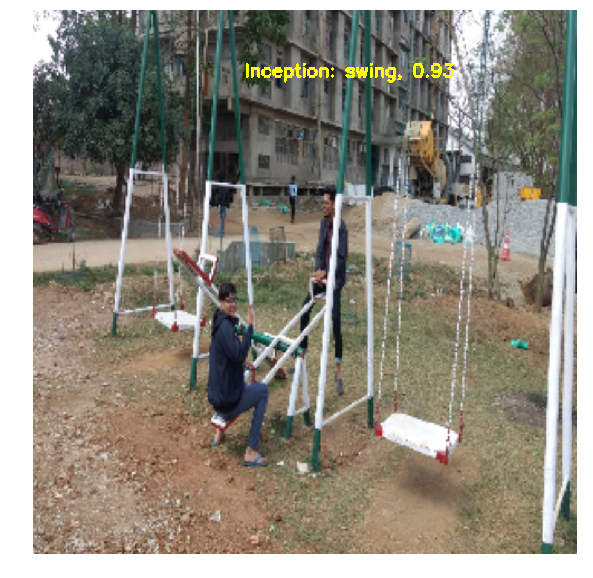

In [9]:
plt.figure(figsize=[10,10])
plt.imshow(numpy_image)
plt.axis('off')